### The purpose of this notebook is to learn and practice EDA and feature engineering techniques

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
import datetime

with open("supermarket_sales.csv", "r") as f:
    df = pd.read_csv(f)

In [2]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Setting display to float format
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.91,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [4]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# Converting Date to DateTime object and engineering features
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['MonthYear'] = df['Date'].dt.to_period('M')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,MonthYear
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10,2019,1,2019-01
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60,2019,3,2019-03
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40,2019,3,2019-03
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33,Ewallet,465.76,4.76,23.29,8.40,2019,1,2019-01
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,604.17,4.76,30.21,5.30,2019,2,2019-02


In [6]:
# Creating a function to assign Month values to their respective Quarter 
def assign_quarter(Month):
    if Month <= 3:
        return 'Q1'
    elif Month >= 4 and Month <= 6:
        return 'Q2'
    elif Month >= 7 and Month <= 9:
        return 'Q3'
    elif Month >= 10 and Month <= 12:
        return 'Q4'
    else:
        return np.nan

In [7]:
df['Quarter'] = df['Month'].apply(assign_quarter)

In [8]:
pd.set_option('display.max_rows', None)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,MonthYear,Quarter
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,...,13:08,Ewallet,522.83,4.76,26.14,9.10,2019,1,2019-01,Q1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,...,10:29,Cash,76.40,4.76,3.82,9.60,2019,3,2019-03,Q1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,...,13:23,Credit card,324.31,4.76,16.22,7.40,2019,3,2019-03,Q1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,...,20:33,Ewallet,465.76,4.76,23.29,8.40,2019,1,2019-01,Q1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,...,10:37,Ewallet,604.17,4.76,30.21,5.30,2019,2,2019-02,Q1


### Technique Report

When I initially wrote out the function to define Quarters. I accidentally wrote >= 3 instead of <= 3.

Using the else statement to assign any values outside of 1-12 to NaN, I was quickly able to ascertain that I made this error.

Further, after checking again once I corrected this mistake, I realized that these data only include sales from the first quarter of 2019.

Moral of the story: df.describe() again after engineering Datetime features.

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97,2019.00,1.99
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72,0.00,0.84
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00,2019.00,1.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50,2019.00,1.00
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00,2019.00,2.00
75%,77.94,8.00,22.45,471.35,448.91,4.76,22.45,8.50,2019.00,3.00
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00,2019.00,3.00


In [10]:
df.shape

(1000, 21)

In [11]:
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
Year                       1000
Month                      1000
MonthYear                  1000
Quarter                    1000
dtype: int64

In [12]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Year                       0
Month                      0
MonthYear                  0
Quarter                    0
dtype: int64

In [38]:
pd.set_option('display.max_columns', None)
df.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,MonthYear,Quarter
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10,2019,1,2019-01,Q1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60,2019,3,2019-03,Q1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40,2019,3,2019-03,Q1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33,Ewallet,465.76,4.76,23.29,8.40,2019,1,2019-01,Q1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,604.17,4.76,30.21,5.30,2019,2,2019-02,Q1
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.89,627.62,2019-03-25,18:30,Ewallet,597.73,4.76,29.89,4.10,2019,3,2019-03,Q1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.65,433.69,2019-02-25,14:36,Ewallet,413.04,4.76,20.65,5.80,2019,2,2019-02,Q1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.78,772.38,2019-02-24,11:38,Ewallet,735.60,4.76,36.78,8.00,2019,2,2019-02,Q1
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.63,76.15,2019-01-10,17:15,Credit card,72.52,4.76,3.63,7.20,2019,1,2019-01,Q1
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.23,172.75,2019-02-20,13:27,Credit card,164.52,4.76,8.23,5.90,2019,2,2019-02,Q1


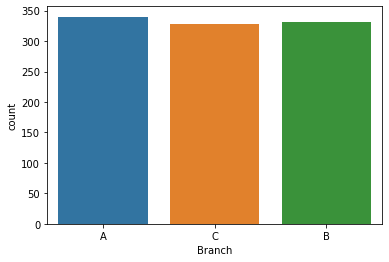

Number of samples per branch 
A    340
B    332
C    328
Name: Branch, dtype: int64


In [32]:
# Number of samples per branch
sns.countplot(x='Branch', data=df)
plt.xticks(rotation=0)
plt.show()
print(f"Number of samples per branch \n{df['Branch'].value_counts()}")

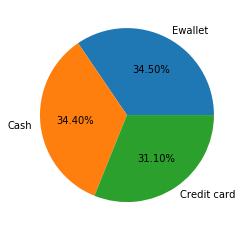

In [34]:
# Breaking down forms of payment by type
plt.pie(df['Payment'].value_counts(), labels=df['Payment'].unique(), autopct='%1.2f%%')
plt.show()

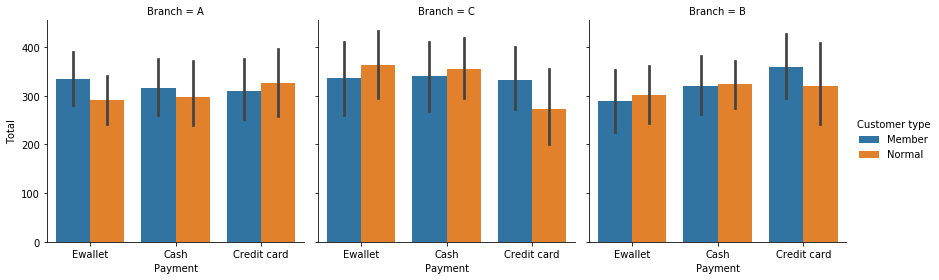

In [40]:
# Displaying total spent at each branch by payment type
sns.catplot(x='Payment', y='Total', hue='Customer type', col='Branch', data=df, kind='bar', height=4)
plt.show()

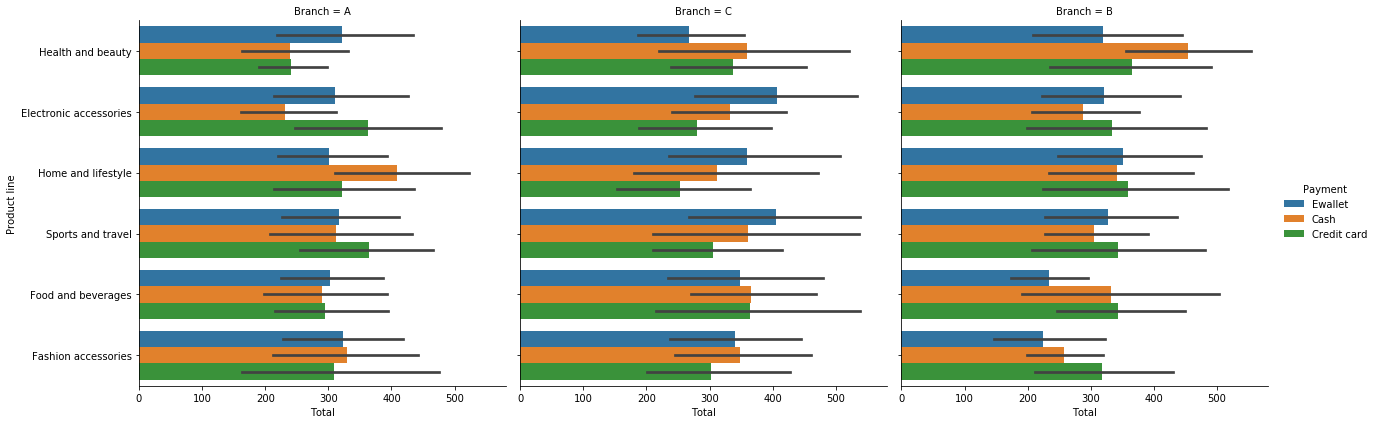

In [43]:
sns.catplot(x='Total', y='Product line', hue='Payment', col='Branch', data=df, kind='bar', height=6)
plt.show()

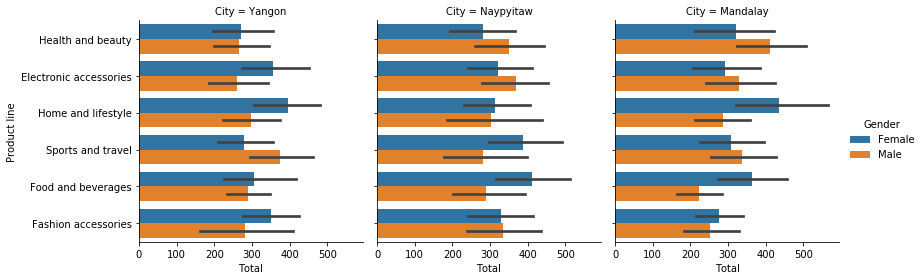

In [44]:
sns.catplot(x='Total', y='Product line', hue='Gender', col='City', data=df, kind='bar', height=4)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd86b4b3d0>],
      dtype=object)

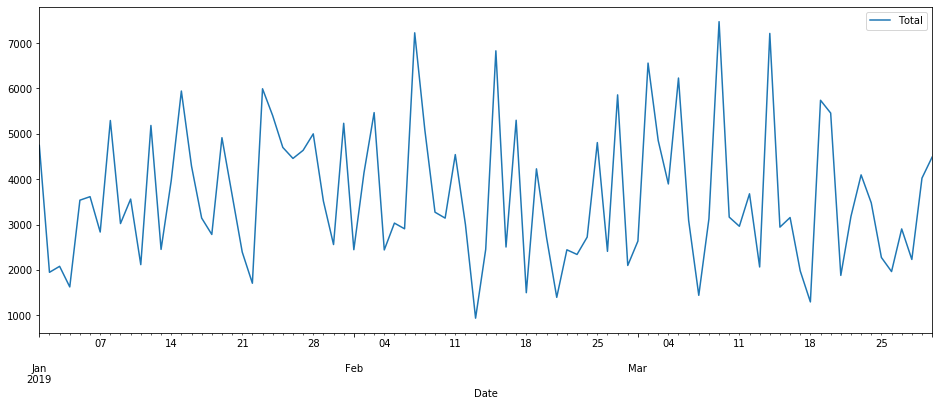

In [47]:
monthly_sales_df = df.groupby(['Date']).sum()
monthly_sales_df[['Total']].plot(figsize=(16,6), subplots=True)

In [54]:
monthly_sales_dfa = df[df['Branch'] == 'A']
monthly_sales_dfa.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,MonthYear,Quarter
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10,2019,1,2019-01,Q1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40,2019,3,2019-03,Q1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33,Ewallet,465.76,4.76,23.29,8.40,2019,1,2019-01,Q1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,604.17,4.76,30.21,5.30,2019,2,2019-02,Q1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.65,433.69,2019-02-25,14:36,Ewallet,413.04,4.76,20.65,5.80,2019,2,2019-02,Q1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd878f84d0>],
      dtype=object)

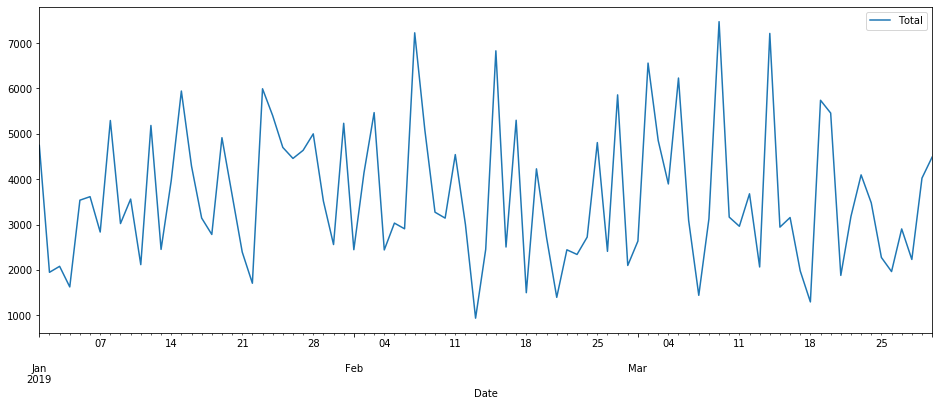

In [52]:
monthly_sales_dfa = monthly_sales_dfa.groupby(['Date']).sum()
monthly_sales_dfa[['Total']].plot(figsize=(16,6), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd87eb1e90>],
      dtype=object)

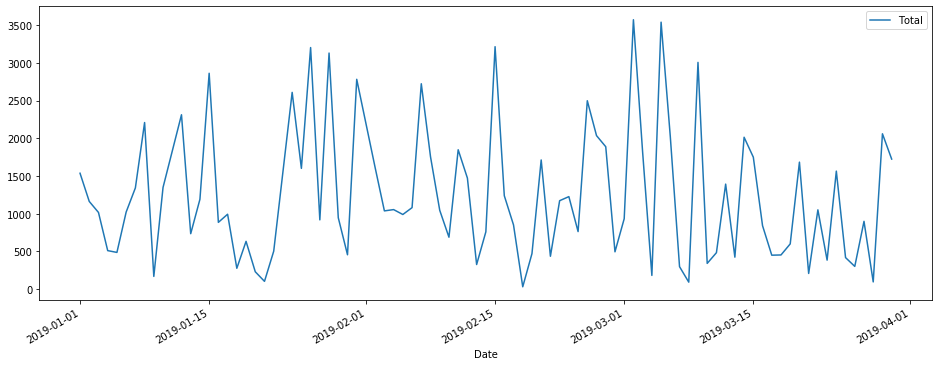

In [59]:
monthly_sales_dfb = df[df['Branch'] == 'B']
monthly_sales_dfb = monthly_sales_dfb.groupby(['Date']).sum()
monthly_sales_dfb[['Total']].plot(figsize=(16,6), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd88862fd0>],
      dtype=object)

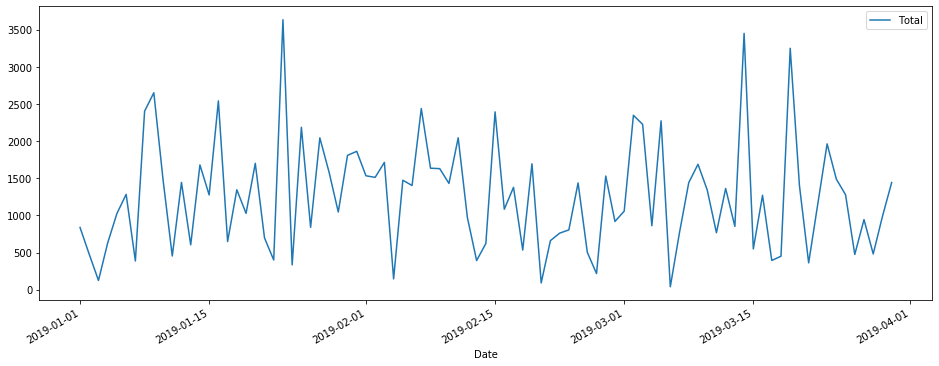

In [61]:
monthly_sales_dfc = df[df['Branch'] == 'C']
monthly_sales_dfc = monthly_sales_dfc.groupby(['Date']).sum()
monthly_sales_dfc[['Total']].plot(figsize=(16,6), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd89bba2d0>],
      dtype=object)

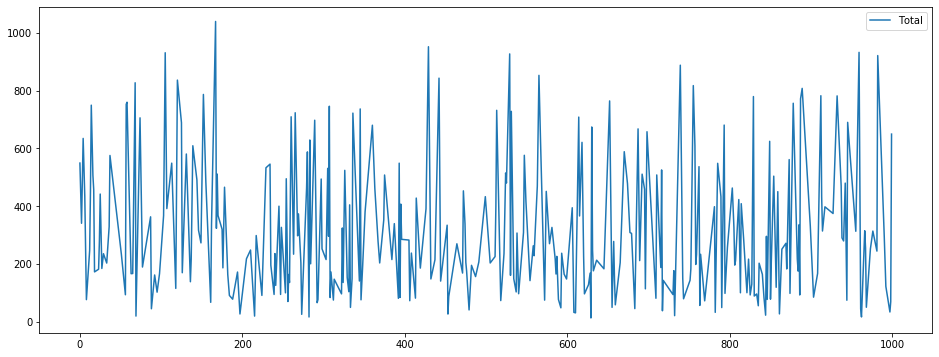

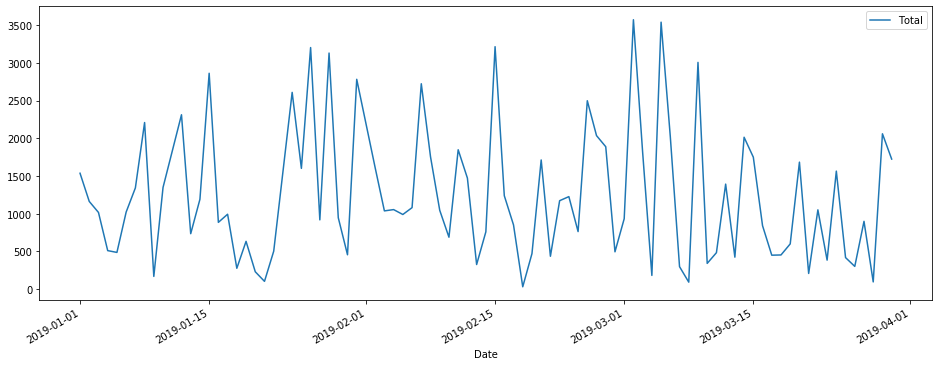

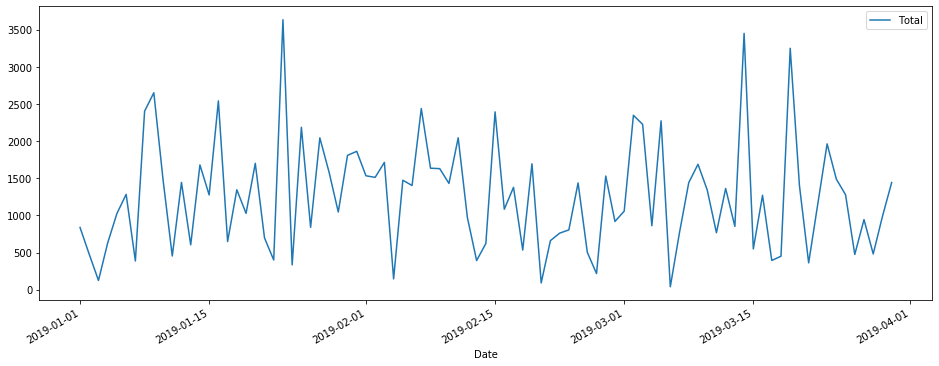

In [63]:
monthly_sales_dfa[['Total']].plot(figsize=(16,6), subplots=True)
monthly_sales_dfb[['Total']].plot(figsize=(16,6), subplots=True)
monthly_sales_dfc[['Total']].plot(figsize=(16,6), subplots=True)

### Let's Create Some Goals

1) How are members shopping vs. non-members?

2) How are sales at the different branches?

3) What are the highest margin products?

4) What categories are more popular between men and women?

5) What form of payment is most preferred?

6) Which categories have the highest ratings?

### 1) How are members shopping vs. non-members?

First let's check how many of each type we have

In [14]:
# Checking how many of each type are represented in the data
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

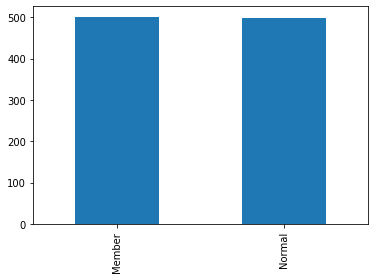

In [15]:
# Visualizing the above data
df['Customer type'].value_counts().plot(kind='bar')

In [16]:
# Creating a dataframe of only Member data and displaying all columns
pd.set_option('display.max_columns', None)
mem_df = df.loc[df['Customer type'] == 'Member']
mem_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,MonthYear,Quarter
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10,2019,1,2019-01,Q1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33,Ewallet,465.76,4.76,23.29,8.40,2019,1,2019-01,Q1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.65,433.69,2019-02-25,14:36,Ewallet,413.04,4.76,20.65,5.80,2019,2,2019-02,Q1
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.63,76.15,2019-01-10,17:15,Credit card,72.52,4.76,3.63,7.20,2019,1,2019-01,Q1
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.23,172.75,2019-02-20,13:27,Credit card,164.52,4.76,8.23,5.90,2019,2,2019-02,Q1
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.90,60.82,2019-02-06,18:07,Ewallet,57.92,4.76,2.90,4.50,2019,2,2019-02,Q1
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.10,107.14,2019-03-09,17:03,Cash,102.04,4.76,5.10,6.80,2019,3,2019-03,Q1
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.12,590.44,2019-01-15,16:19,Cash,562.32,4.76,28.12,4.50,2019,1,2019-01,Q1
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.13,506.64,2019-03-11,11:03,Credit card,482.51,4.76,24.13,4.60,2019,3,2019-03,Q1
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.51,451.71,2019-02-25,11:24,Ewallet,430.20,4.76,21.51,4.80,2019,2,2019-02,Q1


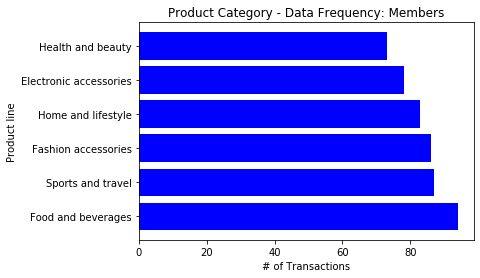

Number of Samples in each Product Category
Food and beverages        94
Sports and travel         87
Fashion accessories       86
Home and lifestyle        83
Electronic accessories    78
Health and beauty         73
Name: Product line, dtype: int64


In [17]:
# Visualizing Member's purchasing categories
plt.figure
plt.barh(mem_df['Product line'].value_counts().index, mem_df['Product line'].value_counts(), color = 'b')
plt.xlabel('# of Transactions')
plt.ylabel('Product line')
plt.title('Product Category - Data Frequency: Members')
plt.show()
print(f"Number of Samples in each Product Category\n{mem_df['Product line'].value_counts()}")

In [18]:
# Creating a dataframe of only Non-Member data
non_mem_df = df.loc[df['Customer type'] == 'Normal']
non_mem_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,MonthYear,Quarter
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60,2019,3,2019-03,Q1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40,2019,3,2019-03,Q1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,604.17,4.76,30.21,5.30,2019,2,2019-02,Q1
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.89,627.62,2019-03-25,18:30,Ewallet,597.73,4.76,29.89,4.10,2019,3,2019-03,Q1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.78,772.38,2019-02-24,11:38,Ewallet,735.60,4.76,36.78,8.00,2019,2,2019-02,Q1
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.74,246.49,2019-02-12,10:25,Ewallet,234.75,4.76,11.74,7.10,2019,2,2019-02,Q1
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.59,453.50,2019-02-07,16:48,Ewallet,431.90,4.76,21.59,8.20,2019,2,2019-02,Q1
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.69,749.49,2019-03-29,19:21,Cash,713.80,4.76,35.69,5.70,2019,3,2019-03,Q1
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.78,457.44,2019-01-01,10:39,Credit card,435.66,4.76,21.78,6.90,2019,1,2019-01,Q1
18,329-62-1586,A,Yangon,Normal,Male,Food and beverages,54.67,3,8.20,172.21,2019-01-21,18:00,Credit card,164.01,4.76,8.20,8.60,2019,1,2019-01,Q1


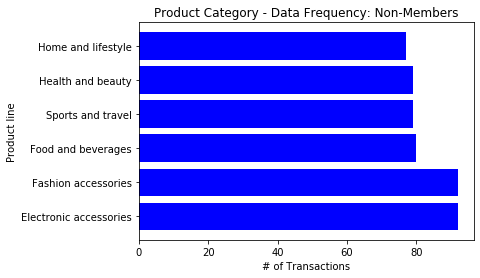

Number of Samples in each Product Category
Electronic accessories    92
Fashion accessories       92
Food and beverages        80
Sports and travel         79
Health and beauty         79
Home and lifestyle        77
Name: Product line, dtype: int64


In [19]:
# Visualizing Non-Member's purchasing categories
plt.figure
plt.barh(non_mem_df['Product line'].value_counts().index, non_mem_df['Product line'].value_counts(), color = 'b')
plt.xlabel('# of Transactions')
plt.ylabel('Product line')
plt.title('Product Category - Data Frequency: Non-Members')
plt.show()
print(f"Number of Samples in each Product Category\n{non_mem_df['Product line'].value_counts()}")

### Result

#### Members top categories are:

1) Food and Beverage

2) Sports and Travel

3) Fashion Accessories

#### Non-Members top categories are:

1) Electronic Accessories

2) Fashion Accessories

3) Food and Beverage

In [20]:
# Aggregating the total spend of Member's by product category
mem_df.groupby(['Product line']).agg({'Total':'sum'}).reset_index().sort_values(by = 'Total', ascending = False)

,Product line,Total
2,Food and beverages,31357.62
5,Sports and travel,28234.30
4,Home and lifestyle,27978.03
1,Fashion accessories,26323.96
3,Health and beauty,25831.04
0,Electronic accessories,24498.49


In [21]:
# Aggregating the total spend of Non-Member's by product category
non_mem_df.groupby(['Product line']).agg({'Total':'sum'}).reset_index().sort_values(by = 'Total', ascending = False)

,Product line,Total
0,Electronic accessories,29839.04
1,Fashion accessories,27981.93
5,Sports and travel,26888.53
4,Home and lifestyle,25883.89
2,Food and beverages,24787.22
3,Health and beauty,23362.70


In [22]:
# Displaying which product category has the highest profit for Members
mem_df.groupby(['Product line']).agg({'Total':'sum', 'cogs': 'sum', 'gross income': 'sum'}).reset_index().sort_values(by = 'Total', ascending = False)

,Product line,Total,cogs,gross income
2,Food and beverages,31357.62,29864.40,1493.22
5,Sports and travel,28234.30,26889.81,1344.49
4,Home and lifestyle,27978.03,26645.74,1332.29
1,Fashion accessories,26323.96,25070.44,1253.52
3,Health and beauty,25831.04,24600.99,1230.05
0,Electronic accessories,24498.49,23331.90,1166.60


In [23]:
# Displaying which product category has the highest profit for Non-Members
non_mem_df.groupby(['Product line']).agg({'Total':'sum', 'cogs': 'sum', 'gross income': 'sum'}).reset_index().sort_values(by = 'Total', ascending = False)

,Product line,Total,cogs,gross income
0,Electronic accessories,29839.04,28418.13,1420.91
1,Fashion accessories,27981.93,26649.46,1332.47
5,Sports and travel,26888.53,25608.12,1280.41
4,Home and lifestyle,25883.89,24651.32,1232.57
2,Food and beverages,24787.22,23606.88,1180.34
3,Health and beauty,23362.70,22250.19,1112.51
